<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45463 non-null  int64  
 1   belongs_to_collection  45376 non-null  float64
 2   budget                 45376 non-null  float64
 3   genres                 45376 non-null  object 
 4   id                     45463 non-null  int64  
 5   original_language      45365 non-null  object 
 6   overview               44435 non-null  object 
 7   popularity             45376 non-null  float64
 8   production_companies   45376 non-null  object 
 9   production_countries   45376 non-null  object 
 10  release_date           45376 non-null  object 
 11  revenue                45376 non-null  float64
 12  runtime                45130 non-null  float64
 13  spoken_languages       45376 non-null  object 
 14  status                 45296 non-null  object 
 15  ta

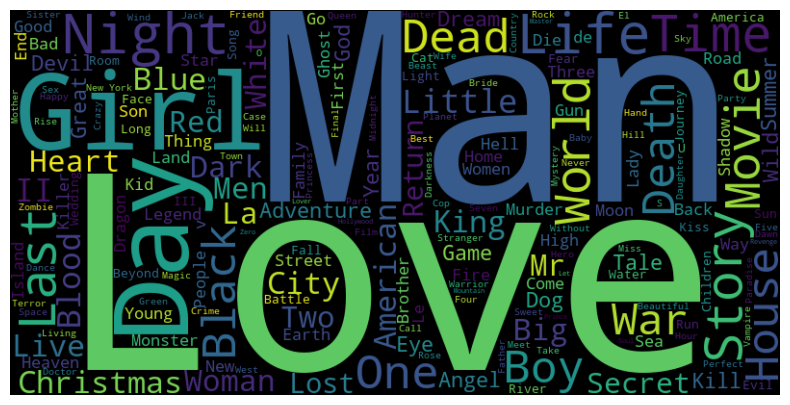

In [2]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Cargar el archivo CSV
file_path = 'archivov4.csv'  # Cambia esto a la ruta del archivo si es necesario
df = pd.read_csv(file_path)

# Mostrar información general del DataFrame
print(df.info())

# Llenar valores nulos en columnas importantes
df['title'] = df['title'].fillna('')
df['overview'] = df['overview'].fillna('')
df['genres'] = df['genres'].fillna('[]')

# Generar una nube de palabras con los títulos
all_titles = " ".join(title for title in df['title'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_titles)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
